### 用iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

* 数据处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
# load_data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

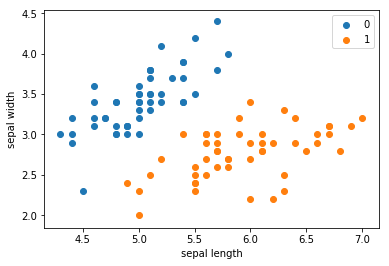

In [10]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [14]:
data = np.array(df.iloc[:100, [0, 1, -1]])
x, y = data[:, :-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])
print(x[0])
print(y[0])

[ 5.1  3.5]
-1


* 感知机

In [17]:
# 建立一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0] )- 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降
    def fit(self, xtrain, ytrain):
        while True:
            flag = 0
            for i in range(len(xtrain)):
                x = xtrain[i]
                y = ytrain[i]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
                    flag = 1
            if flag == 0:
                break
        return "Perceptron Finished!"

In [18]:
perceptron = Model()
perceptron.fit(x, y)

'Perceptron Finished!'

In [19]:
print(perceptron.w)

[  7.8 -10. ]


In [20]:
print(perceptron.b)

-12.1


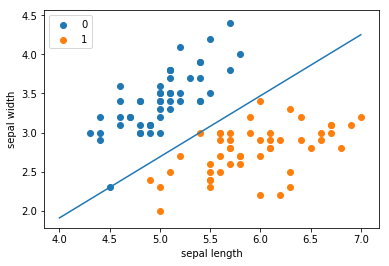

In [22]:
x_ = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0]*x_ + perceptron.b)/perceptron.w[1]
plt.plot(x_, y_)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

* sklearn 实现

In [23]:
from sklearn.linear_model import Perceptron

clf = Perceptron(fit_intercept=False, max_iter=100, shuffle=False)
clf.fit(x, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [24]:
print(clf.coef_)
print(clf.intercept_)

[[ 37.4 -61.1]]
[ 0.]


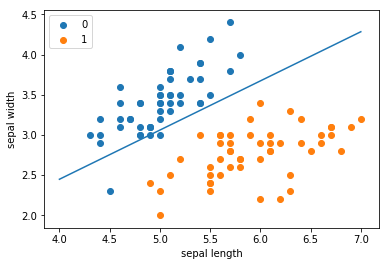

In [32]:
x_ = np.linspace(4, 7, 10)
y_ = -(clf.coef_[0][0]*x_ + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_, y_)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()